In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/B1/df_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7334188 entries, 0 to 7334187
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   timestamp           object 
 2   merchant_category   object 
 3   merchant_type       object 
 4   amount              float64
 5   currency            object 
 6   country             object 
 7   city                object 
 8   card_type           object 
 9   card_present        int64  
 10  device              object 
 11  channel             object 
 12  distance_from_home  int64  
 13  high_risk_merchant  int64  
 14  is_fraud            int64  
 15  hour                int64  
 16  dayofweek           int64  
 17  month               int64  
 18  date                object 
dtypes: float64(1), int64(7), object(11)
memory usage: 1.0+ GB


In [5]:
num_cols = [
    'amount',                # Continuous amount
    'distance_from_home',    # Continuous distance
    'hour',                  # May show extreme transaction times
    'dayofweek',             # Some outlier behavior might align here
    'month'                  # Seasonal trends can skew patterns
]

In [6]:
from scipy.stats import zscore

z_scores = df[num_cols].apply(zscore)
filtered_df = df[(z_scores < 3).all(axis=1)].copy()

print(f"Removed {len(df) - len(filtered_df)} outliers. New shape: {filtered_df.shape}")

Removed 192703 outliers. New shape: (7141485, 19)


In [9]:
numeric_cols = [
    'amount', 'distance_from_home', 'card_present',
    'high_risk_merchant', 'hour', 'dayofweek', 'month', 'is_fraud'
]

corr_df = filtered_df[numeric_cols].copy()

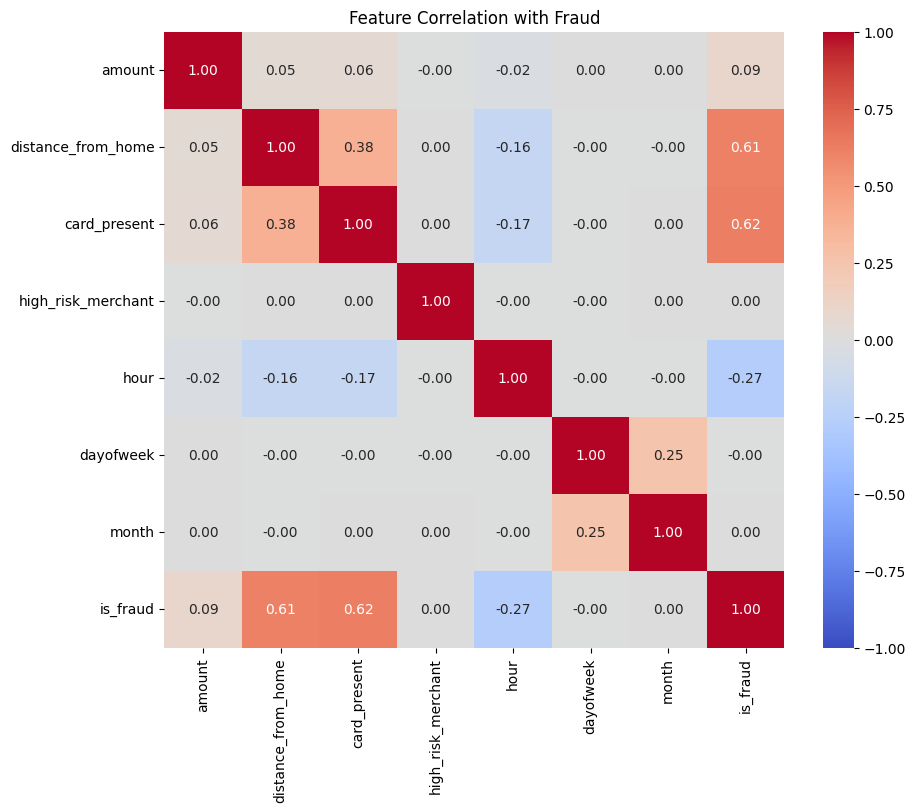

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title("Feature Correlation with Fraud")
plt.show()

In [11]:
filtered_df = filtered_df.drop(columns=['high_risk_merchant', 'dayofweek', 'month'])

In [12]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7141485 entries, 0 to 7334187
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   timestamp           object 
 2   merchant_category   object 
 3   merchant_type       object 
 4   amount              float64
 5   currency            object 
 6   country             object 
 7   city                object 
 8   card_type           object 
 9   card_present        int64  
 10  device              object 
 11  channel             object 
 12  distance_from_home  int64  
 13  is_fraud            int64  
 14  hour                int64  
 15  date                object 
dtypes: float64(1), int64(4), object(11)
memory usage: 926.2+ MB


In [13]:
filtered_df = filtered_df.drop(columns=[
    'customer_id', 'timestamp', 'date', 'city'
])

In [14]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7141485 entries, 0 to 7334187
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   merchant_category   object 
 1   merchant_type       object 
 2   amount              float64
 3   currency            object 
 4   country             object 
 5   card_type           object 
 6   card_present        int64  
 7   device              object 
 8   channel             object 
 9   distance_from_home  int64  
 10  is_fraud            int64  
 11  hour                int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 708.3+ MB


In [15]:
filtered_df.to_csv('/content/drive/MyDrive/B1/df_clean_final.csv', index=False)